In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#listing_estabtypes = pd.read_csv('./data/listing_estabtypes.txt', sep='|')
registration = pd.read_csv('./data/Registration.txt', sep='|', encoding_errors='replace', on_bad_lines='skip')
owner_op = pd.read_csv('./data/Owner_Operator.txt', sep='|', encoding_errors='replace', on_bad_lines='skip')
#reg_listing = pd.read_csv('./data/registration_listing.txt', sep='|', encoding_errors='replace', on_bad_lines='skip')
reg_imp = pd.read_csv('./data/Reg_Imp_ID_by_Manu.txt', sep='|', encoding_errors='replace', on_bad_lines='skip')
listing_pcd = pd.read_csv('./data/Listing_PCD.txt', sep='|', encoding_errors='replace', on_bad_lines='skip')
foiclass = pd.read_csv('./data/foiclass.txt', sep='|', encoding_errors='replace', on_bad_lines='skip')

#### SCRATCH (9/24)
Data wrangling the data frames

In [3]:
output = pd.merge(
    reg_imp,
    listing_pcd,
    left_on="KEY_VAL",
    right_on="key_val",
)

output = output.dropna(subset=['ESTABLISHMENT_REG_KEY']).drop(columns=['key_val', 'EXEMPT'])

out2 = pd.merge(
    output,
    owner_op[['REG_KEY', 'FIRM_NAME']],
    left_on = 'ESTABLISHMENT_REG_KEY',
    right_on = 'REG_KEY'
).drop(columns='REG_KEY').rename(columns={'FIRM_NAME':'MANU_FIRM_NAME',
                                          'OWNER_OPERATOR_NUMBER': 'MANU_OWNER_OPERATOR_NUMBER',
                                          'ESTABLISHMENT_REG_KEY': 'MANU_REG_KEY'})

out2.MANU_REG_KEY = out2.MANU_REG_KEY.astype('int')

out3 = pd.merge(
    out2,
    owner_op[['REG_KEY', 'FIRM_NAME', 'OWNER_OPERATOR_NUMBER']],
    left_on = 'IMPORTER_REG_KEY',
    right_on = 'REG_KEY'
).drop(columns='REG_KEY').rename(columns={'FIRM_NAME':'IMPORTER_FIRM_NAME',
                                          'OWNER_OPERATOR_NUMBER': 'IMPORTER_OWNER_OPERATOR_NUMBER'})

importer = out3[[
    'KEY_VAL',
    'CREATED_DATE',
    'PRODUCT_CODE',
    'IMPORTER_REG_KEY',
    'IMPORTER_OWNER_OPERATOR_NUMBER',
    'IMPORTER_FIRM_NAME',
    'MANU_REG_KEY',
    'MANU_OWNER_OPERATOR_NUMBER',
    'MANU_FIRM_NAME'
]]

importer.CREATED_DATE = pd.to_datetime(importer.CREATED_DATE, format="%m/%d/%Y")
    

In [4]:
a = registration[~registration.REG_KEY.duplicated(keep=False)|(registration.ISO_COUNTRY_CODE != 'US')]

In [5]:
reg_location = a[["REG_KEY", "NAME", "CITY", "STATE_ID", "ISO_COUNTRY_CODE"]]
reg_location.set_index("REG_KEY", inplace=True)

#### Final? Data frames

In [6]:
reg_location

,NAME,CITY,STATE_ID,ISO_COUNTRY_CODE
REG_KEY,,,,
7542,DEGUDENT GMBH,HANAU Hesse,NaN,DE
6813,PALL NEWQUAY,Newquay Cornwall,NaN,GB
6388,ZEUS SCIENTIFIC,BRANCHBURG,NJ,US
8526,"Pascal International, Inc.",Bellevue,WA,US
9037,SEPTODONT HEALTHCARE INDIA PRIVATE LTD.,"VILLAGE-NAVADE, TALUKA-PANVEL Maharashtra",NaN,IN
...,...,...,...,...
330902,"ZEUS GEAR, LLC",Reno,NV,US
331124,BSD PRODUCT DESIGN INC.,Taipei City,NaN,TW
330364,Solventum US LLC,Brookings,SD,US


In [7]:
importer

,KEY_VAL,CREATED_DATE,PRODUCT_CODE,IMPORTER_REG_KEY,IMPORTER_OWNER_OPERATOR_NUMBER,IMPORTER_FIRM_NAME,MANU_REG_KEY,MANU_OWNER_OPERATOR_NUMBER,MANU_FIRM_NAME
0,1651424905,2018-08-28,DYB,323855,1016427,CORDIS CORPORATION,16,1016427,CORDIS CORPORATION
1,1673148225,2018-12-28,MIH,323855,1016427,CORDIS CORPORATION,16,1016427,CORDIS CORPORATION
2,1103542434,2019-05-02,NIM,219886,10037648,"Silk Road Medical, Inc.",16,1016427,CORDIS CORPORATION
3,1522527140,2022-01-20,DYB,323855,1016427,CORDIS CORPORATION,16,1016427,CORDIS CORPORATION
4,1037529483,2023-04-26,DYB,323855,1016427,CORDIS CORPORATION,16,1016427,CORDIS CORPORATION
...,...,...,...,...,...,...,...,...,...
264082,1232861976,2024-08-30,HQY,180127,10048644,Pit Viper LLC,331177,10091347,Direct Vision Supply Limited
264083,1147260290,2024-08-30,HOI,180127,10048644,Pit Viper LLC,331177,10091347,Direct Vision Supply Limited
264084,2019458915,2024-08-30,HQZ,180127,10048644,Pit Viper LLC,331177,10091347,Direct Vision Supply Limited
264085,1769846949,2024-08-30,HOY,180127,10048644,Pit Viper LLC,331177,10091347,Direct Vision Supply Limited


In [8]:
device_types = foiclass.set_index('PRODUCTCODE')[["DEVICENAME", "MEDICALSPECIALTY", "DEVICECLASS"]]
device_types

,DEVICENAME,MEDICALSPECIALTY,DEVICECLASS
PRODUCTCODE,,,
BRW,"Protector, Dental",AN,1
BRX,"Stool, Anesthesia",AN,1
BRY,"Cabinet, Table And Tray, Anesthesia",AN,1
BSE,"Analyzer, Gas, Helium, Gaseous-Phase",AN,2
BSF,"Absorber, Carbon-Dioxide",AN,1
...,...,...,...
RIM,"Laser Marker, Cutter, Or Engraver, Tabletop, C...",NaN,N
RIN,Laser Illuminated Lighting Instrument,NaN,N
RIO,Led Toys And Entertainment Products,NaN,N


#### SCRATCH (9/25)

##### Product Distro

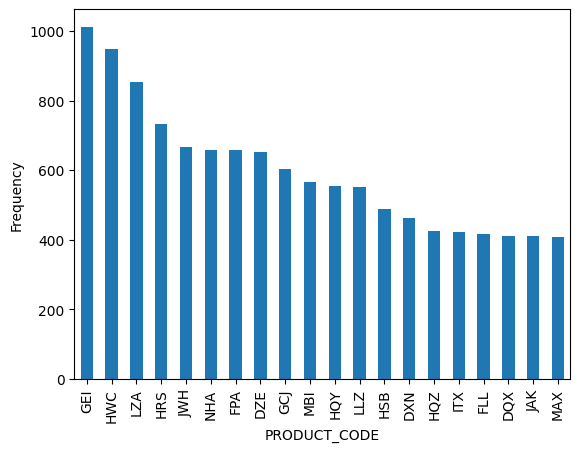

In [9]:
#product_counts = importer[["KEY_VAL", "PRODUCT_CODE"]].PRODUCT_CODE.value_counts()
product_counts = importer[["KEY_VAL", "PRODUCT_CODE"]].drop_duplicates(subset=['KEY_VAL']).PRODUCT_CODE.value_counts()
product_counts.head(20).plot(kind='bar')
plt.ylabel("Frequency");

In [10]:
device_types.loc[product_counts.head(20).index]

,DEVICENAME,MEDICALSPECIALTY,DEVICECLASS
PRODUCT_CODE,,,
GEI,"Electrosurgical, Cutting & Coagulation & Acces...",SU,2
HWC,"Screw, Fixation, Bone",OR,2
LZA,Polymer Patient Examination Glove,HO,1
HRS,"Plate, Fixation, Bone",OR,2
JWH,"Prosthesis, Knee, Patellofemorotibial, Semi-Co...",OR,2
NHA,"Abutment, Implant, Dental, Endosseous",DE,2
FPA,"Set, Administration, Intravascular",HO,2
DZE,"Implant, Endosseous, Root-Form",DE,2
GCJ,"Laparoscope, General & Plastic Surgery",GU,2


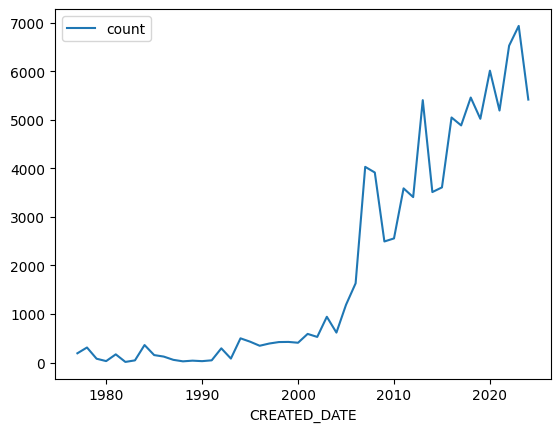

In [11]:
#importer_year = importer.copy()[["CREATED_DATE", "PRODUCT_CODE"]]
importer_year = importer.drop_duplicates(subset=['KEY_VAL'])[["CREATED_DATE", "PRODUCT_CODE"]]

importer_year.CREATED_DATE = importer_year.CREATED_DATE.apply(lambda x: x.year)

importer_year.CREATED_DATE.value_counts().sort_index().reset_index().plot.line("CREATED_DATE", "count");

In [12]:
b = importer_year.groupby("PRODUCT_CODE").CREATED_DATE.value_counts().loc[product_counts.head().index].reset_index()
b

,PRODUCT_CODE,CREATED_DATE,count
0,GEI,2023,117
1,GEI,2022,101
2,GEI,2021,84
3,GEI,2007,73
4,GEI,2019,72
...,...,...,...
103,JWH,2024,14
104,JWH,2011,11
105,JWH,2009,10
106,JWH,2010,3


<Axes: xlabel='CREATED_DATE', ylabel='count'>

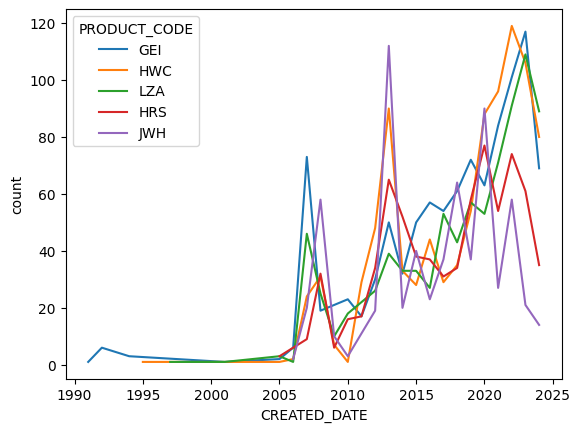

In [13]:
sns.lineplot(data=b, x="CREATED_DATE", y="count", hue="PRODUCT_CODE")

##### Manu/Importer

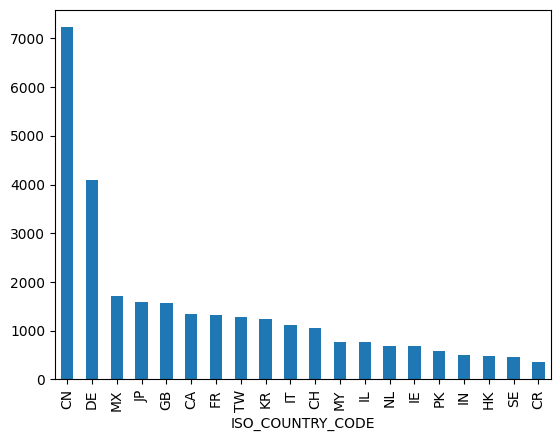

In [14]:
importer_with_year = importer.copy()
importer_with_year['CREATED_YEAR'] = importer_with_year.CREATED_DATE.apply(lambda x: x.year)

manu = pd.merge(
    importer_with_year[["MANU_REG_KEY", "CREATED_YEAR"]].drop_duplicates(),
    reg_location[["ISO_COUNTRY_CODE"]],
    left_on="MANU_REG_KEY",
    right_on="REG_KEY"
)

manu_country_counts = manu.ISO_COUNTRY_CODE.value_counts()
manu_country_counts.head(20).plot(kind='bar');

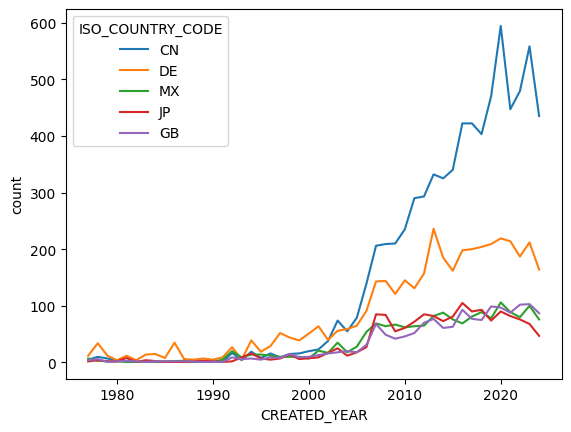

In [15]:
k = manu.groupby('ISO_COUNTRY_CODE').CREATED_YEAR.value_counts().loc[manu_country_counts.head().index].reset_index()
sns.lineplot(data=k, x="CREATED_YEAR", y="count", hue="ISO_COUNTRY_CODE");

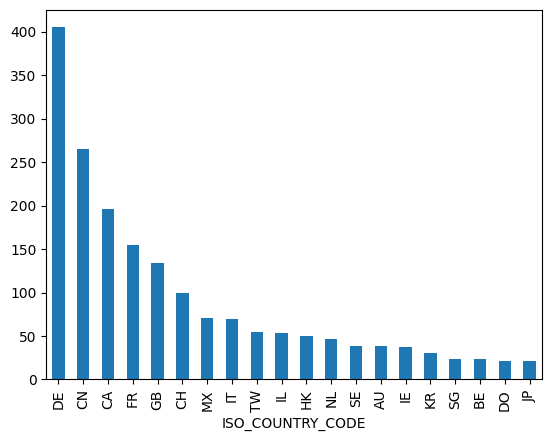

In [16]:
# importers minus US 
imp = pd.merge(
    importer_with_year[["IMPORTER_REG_KEY", "CREATED_YEAR"]].drop_duplicates(),
    reg_location[["ISO_COUNTRY_CODE"]],
    left_on="IMPORTER_REG_KEY",
    right_on="REG_KEY"
)

imp_country_counts = imp.ISO_COUNTRY_CODE.value_counts()
imp_country_counts.drop('US').head(20).plot(kind='bar');

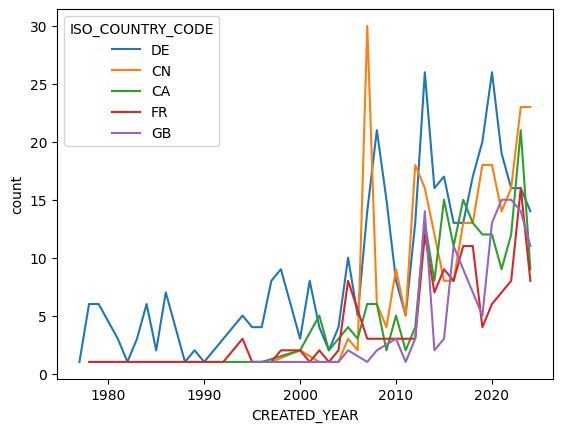

In [17]:
k = imp.groupby('ISO_COUNTRY_CODE').CREATED_YEAR.value_counts().loc[imp_country_counts.head(6).index[1:]].reset_index()
sns.lineplot(data=k, x="CREATED_YEAR", y="count", hue="ISO_COUNTRY_CODE");